<a href="https://colab.research.google.com/github/Zelechos/Pragmatic_IA/blob/master/Vision%20Por%20Computadora/TorchVision_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primero Importamos TorchVision

In [2]:
import torch
import torchvision

### Descargamos el dataset de CIFAR10

In [3]:
# Importamos CIFAR10 de torchvision
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data


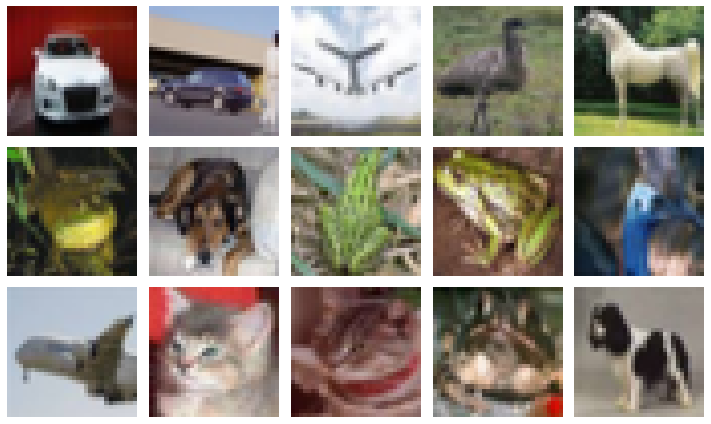

In [4]:
import random
import matplotlib.pyplot as plt

filas, columnas = 3, 5

fig = plt.figure(figsize=(2*columnas, 2*filas))

for _fila in range(filas):
    for _columna in range(columnas):
        
        ax = plt.subplot(filas, columnas, _fila*columnas + _columna + 1)
        ix = random.randint(0, len(trainset))
        img, label = trainset[ix]
        plt.axis("off")
        plt.imshow(img)
        
plt.tight_layout()
plt.show()

In [5]:
 trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

Files already downloaded and verified


In [6]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop((28,28)),      
        torchvision.transforms.Resize((32,32)),      
        torchvision.transforms.RandomHorizontalFlip(),
        # ...
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

Files already downloaded and verified


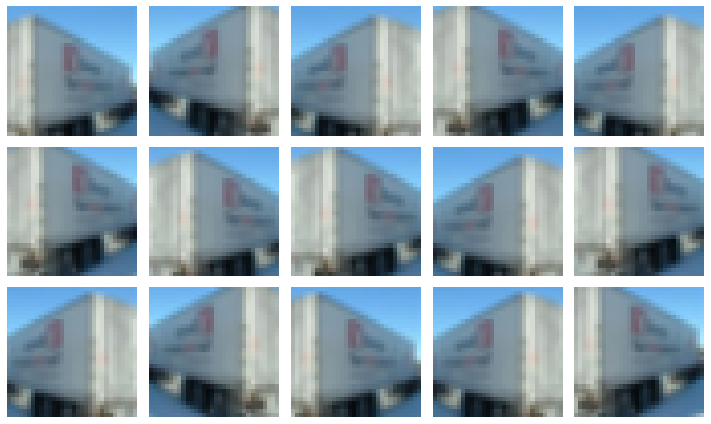

In [8]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = 15
        img, label = trainset[ix]
        plt.axis("off")
        # desnormalizar
        img = img*0.5 + 0.5 
        img = img.permute(1, 2, 0)
        plt.imshow(img)
plt.tight_layout()
plt.show()

# Modelo de torchvision

In [9]:
# Vamos a exportamos el modelo resnet para entrenar nuestro dataset que tambien es parte de torchvision
resnet = torchvision.models.resnet18()

In [11]:
# Una vez descargada la red Podemos Inspeccionar todas sus capas 
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
# Tambien podemos decargar las red neuronal resnet pre entrenada 

resnet_Pre_entrenada = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [13]:
# Mostramos la resnet pre entrenada
print(resnet_Pre_entrenada)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Cambiamos la creacion de la ultima capa de la resnet  de la siguiente manera dado que la entrenaremos ahora con el dataset CIFAR10



In [14]:
# Cambiando de valor los parametros de la capa Linear de la resnet
out_features = 10 
in_features = resnet.fc.in_features
# Sustituimos la capa Linear de la resnet
resnet.fc = torch.nn.Linear(in_features , out_features)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
# x_min, y_min, x_max, y_max
# En esta celda lo que hacemos es comparar cajas usando el  torchvision.ops.box_iou
box1 = torch.tensor([[0, 0, 1, 1], [0, 0, 0.5, 0.5]])
box2 = torch.tensor([[0, 0, 1, 1], [0.5, 0.5, 1, 1]])
torchvision.ops.box_iou(box1, box2)

tensor([[1.0000, 0.2500],
        [0.2500, 0.0000]])